In [83]:
import pandas as pd
import numpy as np
from collections import Counter

In [281]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
y_train = train['SalePrice']
train = train.drop('SalePrice', axis=1)

In [99]:
variances = np.var(train)
full = pd.concat([train,test], ignore_index=True)

In [ ]:
# 1. Drop categorical features that has 95% or more data that's in the same category. 
# 90% is a threshold that we can tune later. 

In [97]:
categorical_features = train.select_dtypes(include=[np.object])
numeric_features = train.select_dtypes(include=[np.number])

In [139]:
def peek_count(variable):
    train_count = Counter(train[variable]).most_common()[0][1]
    test_count = Counter(test[variable]).most_common()[0][1]
    return (train_count, test_count)

In [182]:
threshold = 0.95*1460
threshold

1387.0

In [183]:
feature_to_drop = []
for i in categorical_features:
    if min(peek_count(i)) >= threshold:
        print(i, min(peek_count(i)))
        feature_to_drop.append(i)

Street 1453
Utilities 1457
Condition2 1444
RoofMatl 1434
Heating 1428
PoolQC 1453
MiscFeature 1406


In [184]:
full_drop = full.drop(columns = feature_to_drop)
train_drop = train.drop(columns = feature_to_drop)
test_drop = test.drop(columns = feature_to_drop)

In [185]:
len(list(full_drop))

73

In [186]:
# 2. Handling Missing data

In [187]:
numeric_missing = numeric_features.isnull().sum()
numeric_missing[numeric_missing>0].sort_values(ascending = False)
# For numeric features, not much is missing. So we are not going to drop any of the numeric features.

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [188]:
total_train = train_drop.isnull().sum()
percent_train = (train_drop.isnull().sum()/train_drop.isnull().count())
total_test = test_drop.isnull().sum()
percent_test = (test_drop.isnull().sum()/test_drop.isnull().count())
total_full = full_drop.isnull().sum()
percent_full = (full_drop.isnull().sum()/full_drop.isnull().count())
missing_data = pd.concat([total_train, percent_train, total_test, percent_test, total_full,
                         percent_full], axis=1, 
                         keys=['Total_train', 'Percent_train', 'Total_test', 'Percent_test',
                              'Total_full', 'Percent_full'])

In [189]:
# Have a look at the missing values. and start the imputation and data munging. 
# For missing values, imputing. 
# For categorical values, do label encoding.
# For numerical values, do normalization. 

In [191]:
missing_table = missing_data[missing_data.Total_full!=0].reset_index()

In [192]:
missing_table

,index,Total_train,Percent_train,Total_test,Percent_test,Total_full,Percent_full
0,MSZoning,0,0.000000,4,0.002742,4,0.001370
1,LotFrontage,259,0.177397,227,0.155586,486,0.166495
2,Alley,1369,0.937671,1352,0.926662,2721,0.932169
3,Exterior1st,0,0.000000,1,0.000685,1,0.000343
4,Exterior2nd,0,0.000000,1,0.000685,1,0.000343
5,MasVnrType,8,0.005479,16,0.010966,24,0.008222
6,MasVnrArea,8,0.005479,15,0.010281,23,0.007879
7,BsmtQual,37,0.025342,44,0.030158,81,0.027749
8,BsmtCond,37,0.025342,45,0.030843,82,0.028092
9,BsmtExposure,38,0.026027,44,0.030158,82,0.028092


In [ ]:
# First, impute those with random missing values and replace the missing values with a random category or number.

In [198]:
missing_5 = missing_table[missing_table.Total_full<=5]

In [230]:
def random_fill_cate(variable):
    train_drop[variable] = train_drop[variable].fillna(np.random.choice(list(set(train_drop[variable]))))
    test_drop[variable] = test_drop[variable].fillna(np.random.choice(list(set(test_drop[variable]))))

In [231]:
for i in missing_5['index']:
    if i in categorical_features:
        random_fill_cate(i)
    else:
        train_drop[i] = train_drop[i].fillna(0)
        test_drop[i] = test_drop[i].fillna(0)

In [233]:
# Check if every variable has been imputed. 
for i in missing_5['index']:
    print(i,test_drop[i].isnull().sum())

MSZoning 0
Exterior1st 0
Exterior2nd 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Electrical 0
BsmtFullBath 0
BsmtHalfBath 0
KitchenQual 0
Functional 0
GarageCars 0
GarageArea 0
SaleType 0


In [234]:
missing_NR = missing_table[missing_table.Total_full > 5]
missing_NR

,index,Total_train,Percent_train,Total_test,Percent_test,Total_full,Percent_full
1,LotFrontage,259,0.177397,227,0.155586,486,0.166495
2,Alley,1369,0.937671,1352,0.926662,2721,0.932169
5,MasVnrType,8,0.005479,16,0.010966,24,0.008222
6,MasVnrArea,8,0.005479,15,0.010281,23,0.007879
7,BsmtQual,37,0.025342,44,0.030158,81,0.027749
8,BsmtCond,37,0.025342,45,0.030843,82,0.028092
9,BsmtExposure,38,0.026027,44,0.030158,82,0.028092
10,BsmtFinType1,37,0.025342,42,0.028787,79,0.027064
12,BsmtFinType2,38,0.026027,42,0.028787,80,0.027407
21,FireplaceQu,690,0.472603,730,0.500343,1420,0.486468


In [245]:
impute_with_none_list = []
impute_numeric_list = []
for i in missing_NR['index']:
    if i in categorical_features:
        impute_with_none_list.append(i)
    else:
        impute_numeric_list.append(i)

In [244]:
def impute_with_none(variable):
    train_drop.loc[train_drop[variable].isnull(),variable] = 'none'
    test_drop.loc[train_drop[variable].isnull(),variable] = 'none'
for i in impute_with_none_list:
    impute_with_none(i)

In [248]:
train_drop.loc[train_drop['MasVnrArea'].isnull(),'MasVnrArea'] = 0
train_drop.loc[train_drop['GarageYrBlt'].isnull(),'GarageYrBlt'] = 0
test_drop.loc[test_drop['MasVnrArea'].isnull(),'MasVnrArea'] = 0
test_drop.loc[test_drop['GarageYrBlt'].isnull(),'GarageYrBlt'] = 0

In [249]:
train_drop['SqrtLotArea']=np.sqrt(train_drop['LotArea'])
train_drop.LotFrontage[train_drop['LotFrontage'].isnull()]=train_drop.SqrtLotArea[train_drop['LotFrontage'].isnull()]
del train_drop['SqrtLotArea']train_drop.loc[train_drop[variable].isnull(),variable] = 'none'


In [250]:
test_drop['SqrtLotArea']=np.sqrt(test_drop['LotArea'])
test_drop.LotFrontage[test_drop['LotFrontage'].isnull()]=test_drop.SqrtLotArea[test_drop['LotFrontage'].isnull()]
del test_drop['SqrtLotArea']


In [268]:
from sklearn.preprocessing import LabelEncoder

label_train = train_drop.copy()
label_test = test_drop.copy()

for c in label_train.columns:
    if label_train[c].dtype == 'object':
        le = LabelEncoder()
        # Need to convert the column type to string in order to encode missing values
        label_train[c] = le.fit_transform(label_train[c].astype(str))
        label_test[c] = le.fit_transform(label_test[c].astype(str))

In [275]:
x_train = label_train.iloc[:,1:]
x_test = label_test.iloc[:,1:]
len(list(x_test))

72

In [300]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(oob_score=True, random_state=42)
randomForest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [302]:
y_train.astype(float)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

In [303]:
randomForest.oob_score_

0.7280110226169385

In [304]:
randomForest.predict(x_train)

array([202040. , 176650. , 212850. , ..., 269000. , 149937.5, 148500. ])

In [305]:
results = randomForest.predict(x_test)

In [306]:
results[0].dtype

dtype('float64')

In [280]:
np.savetxt("results.csv", results, delimiter=",")

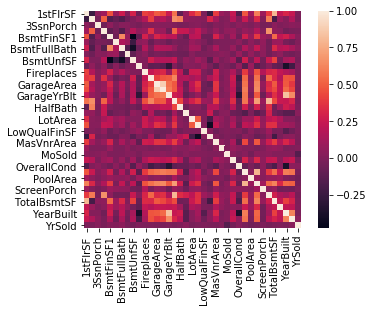

In [13]:
import seaborn as sns
corr = full.corr()
sns.heatmap(corr, vmax = 1, square = True)